# Lego analiza z użyciem PCA

Źródło danych: https://rebrickable.com/downloads/

![dane](downloads_schema_v3.png)

### Import Bibliotek

In [20]:
import pandas as pd
import numpy as np

### Wczytanie danych

In [21]:
sets=pd.read_csv('sets.csv')
sets.head()

,set_num,name,year,theme_id,num_parts,img_url
0,0003977811-1,Ninjago: Book of Adventures,2022,761,1,https://cdn.rebrickable.com/media/sets/0003977...
1,001-1,Gears,1965,756,43,https://cdn.rebrickable.com/media/sets/001-1.jpg
2,0011-2,Town Mini-Figures,1979,67,12,https://cdn.rebrickable.com/media/sets/0011-2.jpg
3,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0,https://cdn.rebrickable.com/media/sets/0011-3.jpg
4,0012-1,Space Mini-Figures,1979,143,12,https://cdn.rebrickable.com/media/sets/0012-1.jpg


In [22]:
themes=pd.read_csv('themes.csv')
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,3,Competition,1.0
2,4,Expert Builder,1.0
3,16,RoboRiders,1.0
4,17,Speed Slammers,1.0


In [23]:
inv_parts=pd.read_csv('inventory_parts.csv')
inv_parts.head()

,inventory_id,part_num,color_id,quantity,is_spare,img_url
0,1,48379c04,72,1,False,https://cdn.rebrickable.com/media/parts/photos...
1,1,48391,0,1,False,https://cdn.rebrickable.com/media/parts/photos...
2,1,48395,7,1,False,https://cdn.rebrickable.com/media/parts/photos...
3,1,48864c01,25,1,False,NaN
4,1,stickerupn0077,9999,1,False,NaN


In [24]:
colors=pd.read_csv('colors.csv')
colors.head()

,id,name,rgb,is_trans
0,-1,[Unknown],0033B2,False
1,0,Black,05131D,False
2,1,Blue,0055BF,False
3,2,Green,237841,False
4,3,Dark Turquoise,008F9B,False


### Sprawdzamy Typy Danych

In [25]:
sets.dtypes

set_num      object
name         object
year          int64
theme_id      int64
num_parts     int64
img_url      object
dtype: object

In [26]:
inv_parts.dtypes

inventory_id     int64
part_num        object
color_id         int64
quantity         int64
is_spare          bool
img_url         object
dtype: object

In [27]:
themes.dtypes

id             int64
name          object
parent_id    float64
dtype: object

In [28]:
colors.dtypes

id           int64
name        object
rgb         object
is_trans      bool
dtype: object

### Sprawdzamy obecność wartości NULL

In [29]:
sets.isnull().sum()

set_num      0
name         0
year         0
theme_id     0
num_parts    0
img_url      0
dtype: int64

In [30]:
inv_parts.isnull().sum()

inventory_id       0
part_num           0
color_id           0
quantity           0
is_spare           0
img_url         7040
dtype: int64

In [31]:
themes.isnull().sum()

id             0
name           0
parent_id    144
dtype: int64

In [32]:
colors.isnull().sum()

id          0
name        0
rgb         0
is_trans    0
dtype: int64

### Sprawdzamy informacje na temat rozmiarów tabel

In [33]:
sets.shape

(24302, 6)

In [34]:
themes.shape

(469, 3)

In [35]:
inv_parts.shape

(1302124, 6)

In [36]:
colors.shape

(267, 4)

In [37]:
sets.columns

Index(['set_num', 'name', 'year', 'theme_id', 'num_parts', 'img_url'], dtype='object')

In [38]:
len(sets.columns)

6

In [39]:
sets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24302 entries, 0 to 24301
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   set_num    24302 non-null  object
 1   name       24302 non-null  object
 2   year       24302 non-null  int64 
 3   theme_id   24302 non-null  int64 
 4   num_parts  24302 non-null  int64 
 5   img_url    24302 non-null  object
dtypes: int64(3), object(3)
memory usage: 1.1+ MB


In [40]:
inv_parts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302124 entries, 0 to 1302123
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   inventory_id  1302124 non-null  int64 
 1   part_num      1302124 non-null  object
 2   color_id      1302124 non-null  int64 
 3   quantity      1302124 non-null  int64 
 4   is_spare      1302124 non-null  bool  
 5   img_url       1295084 non-null  object
dtypes: bool(1), int64(3), object(2)
memory usage: 50.9+ MB


In [41]:
colors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        267 non-null    int64 
 1   name      267 non-null    object
 2   rgb       267 non-null    object
 3   is_trans  267 non-null    bool  
dtypes: bool(1), int64(1), object(2)
memory usage: 6.6+ KB


In [42]:
themes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         469 non-null    int64  
 1   name       469 non-null    object 
 2   parent_id  325 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 11.1+ KB


## Łączenie dwóch zbiorów danych

In [43]:
sets_themes = pd.merge(sets, themes, 
                     how='left',
                     left_on='theme_id',
                     right_on='id',
                     suffixes=('_sets','_themes')
                    )

In [44]:
sets_themes.head()

,set_num,name_sets,year,theme_id,num_parts,img_url,id,name_themes,parent_id
0,0003977811-1,Ninjago: Book of Adventures,2022,761,1,https://cdn.rebrickable.com/media/sets/0003977...,761,Activity Books with LEGO Parts,497.0
1,001-1,Gears,1965,756,43,https://cdn.rebrickable.com/media/sets/001-1.jpg,756,Samsonite,365.0
2,0011-2,Town Mini-Figures,1979,67,12,https://cdn.rebrickable.com/media/sets/0011-2.jpg,67,Classic Town,50.0
3,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0,https://cdn.rebrickable.com/media/sets/0011-3.jpg,199,Lion Knights,186.0
4,0012-1,Space Mini-Figures,1979,143,12,https://cdn.rebrickable.com/media/sets/0012-1.jpg,143,Supplemental,126.0


In [48]:
#sets.head()

In [49]:
#themes.head()

In [50]:
#pd.merge?

## PCA test 1 (na razie omińmy)

In [58]:
#!pip install scikit-learn
#!pip install matplotlib

In [54]:
from sklearn import datasets

In [59]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

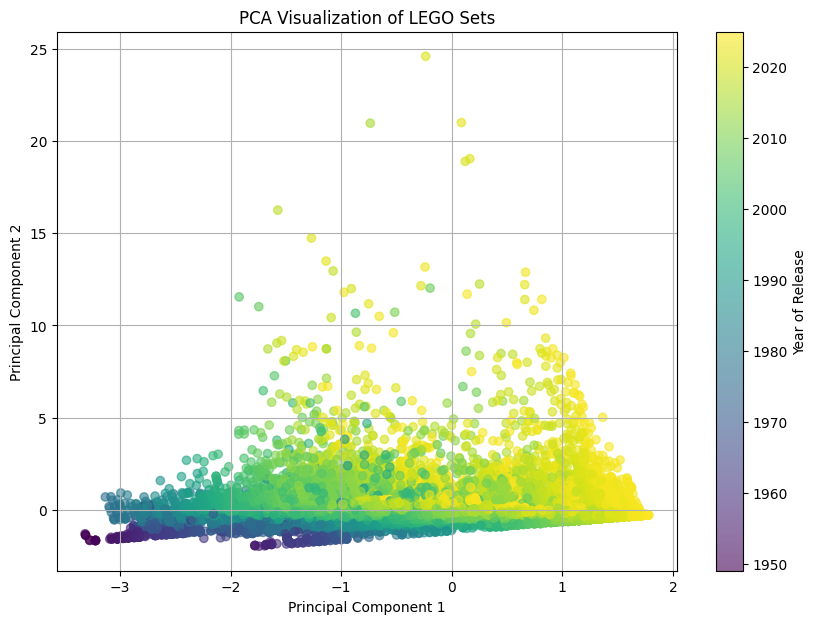

In [61]:
# Wybór kolumn dla analizy PCA
# Wybieramy num_parts, year i id_theme (jako liczbową reprezentację tematów)
data = sets_themes[['num_parts', 'year', 'theme_id']]

# Usuwanie brakujących wartości
data = data.dropna()

# Standaryzacja cech
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Wykonanie PCA
pca = PCA(n_components=2)  # Redukcja do 2 wymiarów
pca_result = pca.fit_transform(data_scaled)

# Dodanie wyników PCA do ramki danych
sets_themes['PCA1'] = pca_result[:, 0]
sets_themes['PCA2'] = pca_result[:, 1]

# Wizualizacja wyników PCA
plt.figure(figsize=(10, 7))
plt.scatter(sets_themes['PCA1'], sets_themes['PCA2'], alpha=0.6, c=sets_themes['year'], cmap='viridis')
plt.colorbar(label="Year of Release")
plt.title("PCA Visualization of LEGO Sets")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

## PCA test 2 (algorytm działa, ale musimy dobrać sensowne dane do wnioskowania)

### Step 0: Pobranie i uporządkowanie danych

In [2]:
import pandas as pd

In [17]:

# Wczytanie plików CSV
inventories = pd.read_csv("inventories.csv")
inventory_sets = pd.read_csv("inventory_sets.csv")
sets = pd.read_csv("sets.csv")
themes = pd.read_csv("themes.csv")
inventory_minifigs = pd.read_csv("inventory_minifigs.csv")
inventory_parts = pd.read_csv("inventory_parts.csv")

# Połączenie tabel dla zestawów
# Łączenie zestawów z tematami
sets_themes = pd.merge(sets, themes, left_on="theme_id", right_on="id", suffixes=("_set", "_theme"))

# Dodanie inwentarzy do zestawów
sets_inventories = pd.merge(sets_themes, inventories, left_on="set_num", right_on="set_num", suffixes=("", "_inventory"))

# Liczba minifigurek
minifigs_per_set = pd.merge(sets_inventories, inventory_minifigs, left_on="id_inventory", right_on="inventory_id", how="left")
minifigs_per_set = minifigs_per_set.groupby(["theme_id", "name_theme", "set_num", "year"]).agg(
    total_minifigs=("quantity", "sum")
).reset_index()

# Ogólna liczba elementów
parts_per_set = pd.merge(sets_inventories, inventory_parts, left_on="id_inventory", right_on="inventory_id", how="left")
total_elements_per_set = parts_per_set.groupby(["theme_id", "name_theme", "set_num", "year"]).agg(
    total_elements=("quantity", "sum")
).reset_index()

# Liczba unikalnych elementów
unique_elements_per_set = parts_per_set.groupby(["theme_id", "name_theme", "set_num", "year"]).agg(
    unique_elements=("part_num", "nunique")
).reset_index()

# Połączenie danych
final_data = pd.merge(minifigs_per_set, total_elements_per_set, on=["theme_id", "name_theme", "set_num", "year"], how="outer")
final_data = pd.merge(final_data, unique_elements_per_set, on=["theme_id", "name_theme", "set_num", "year"], how="outer")

# Uzupełnienie brakujących wartości zerami
final_data = final_data.fillna(0)

# Wynikowa tabela
final_data.head()

,theme_id,name_theme,set_num,year,total_minifigs,total_elements,unique_elements
0,1,Technic,1030-1,1985,0.0,210.0,66
1,1,Technic,1038-1,1985,0.0,120.0,40
2,1,Technic,1039-1,1986,0.0,39.0,9
3,1,Technic,1237-1,2001,0.0,56.0,20
4,1,Technic,1257-1,1999,0.0,33.0,16


In [20]:
# Usunięcie niepotrzebnych kolumn
final_data = final_data.drop(columns=["set_num", "theme_id"])

# Wynikowa tabela
final_data.head()



,name_theme,year,total_minifigs,total_elements,unique_elements
0,Technic,1985,0.0,210.0,66
1,Technic,1985,0.0,120.0,40
2,Technic,1986,0.0,39.0,9
3,Technic,2001,0.0,56.0,20
4,Technic,1999,0.0,33.0,16


różna od zero ilość minifigs

In [21]:
# Filtr zestawów z ilością minifigurek != 0
sets_with_minifigs = final_data[final_data['total_minifigs'] > 0]

# Liczba takich zestawów
#num_sets_with_minifigs = sets_with_minifigs['set_num'].nunique()
sets_with_minifigs

,name_theme,year,total_minifigs,total_elements,unique_elements
245,Technic,1997,1.0,138.0,49
246,Technic,1996,1.0,129.0,49
247,Technic,1995,2.0,188.0,50
249,Technic,1997,1.0,186.0,57
250,Technic,1996,2.0,346.0,57
...,...,...,...,...,...
24291,Dungeons & Dragons,2024,1.0,3.0,3
24292,Dungeons & Dragons,2024,1.0,2.0,2
24293,Dungeons & Dragons,2024,1.0,4.0,4
24294,Dungeons & Dragons,2024,1.0,5.0,4


### Step 1: Load data

In [23]:
df = final_data

In [24]:
df

,name_theme,year,total_minifigs,total_elements,unique_elements
0,Technic,1985,0.0,210.0,66
1,Technic,1985,0.0,120.0,40
2,Technic,1986,0.0,39.0,9
3,Technic,2001,0.0,56.0,20
4,Technic,1999,0.0,33.0,16
...,...,...,...,...,...
24297,Botanicals,2025,0.0,0.0,0
24298,Botanicals,2025,0.0,0.0,0
24299,Botanicals,2025,0.0,0.0,0
24300,Botanicals,2025,0.0,0.0,0


### Step 2: Standardize the Data

In [28]:
from sklearn.preprocessing import StandardScaler
features = ['year', 'total_minifigs', 'total_elements', 'unique_elements']

# Separating out the features
x = df.loc[:, features].values

# Separating out the target
target = "name_theme"
y = df.loc[:,[target]].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

### Step 3: PCA Projection to 2D

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [31]:
finalDf = pd.concat([principalDf, df[[target]]], axis = 1)

### Step 4: Visualize 2D Projection

#### Wersja dla wszystkich nazw (nic się nie dowiemy)

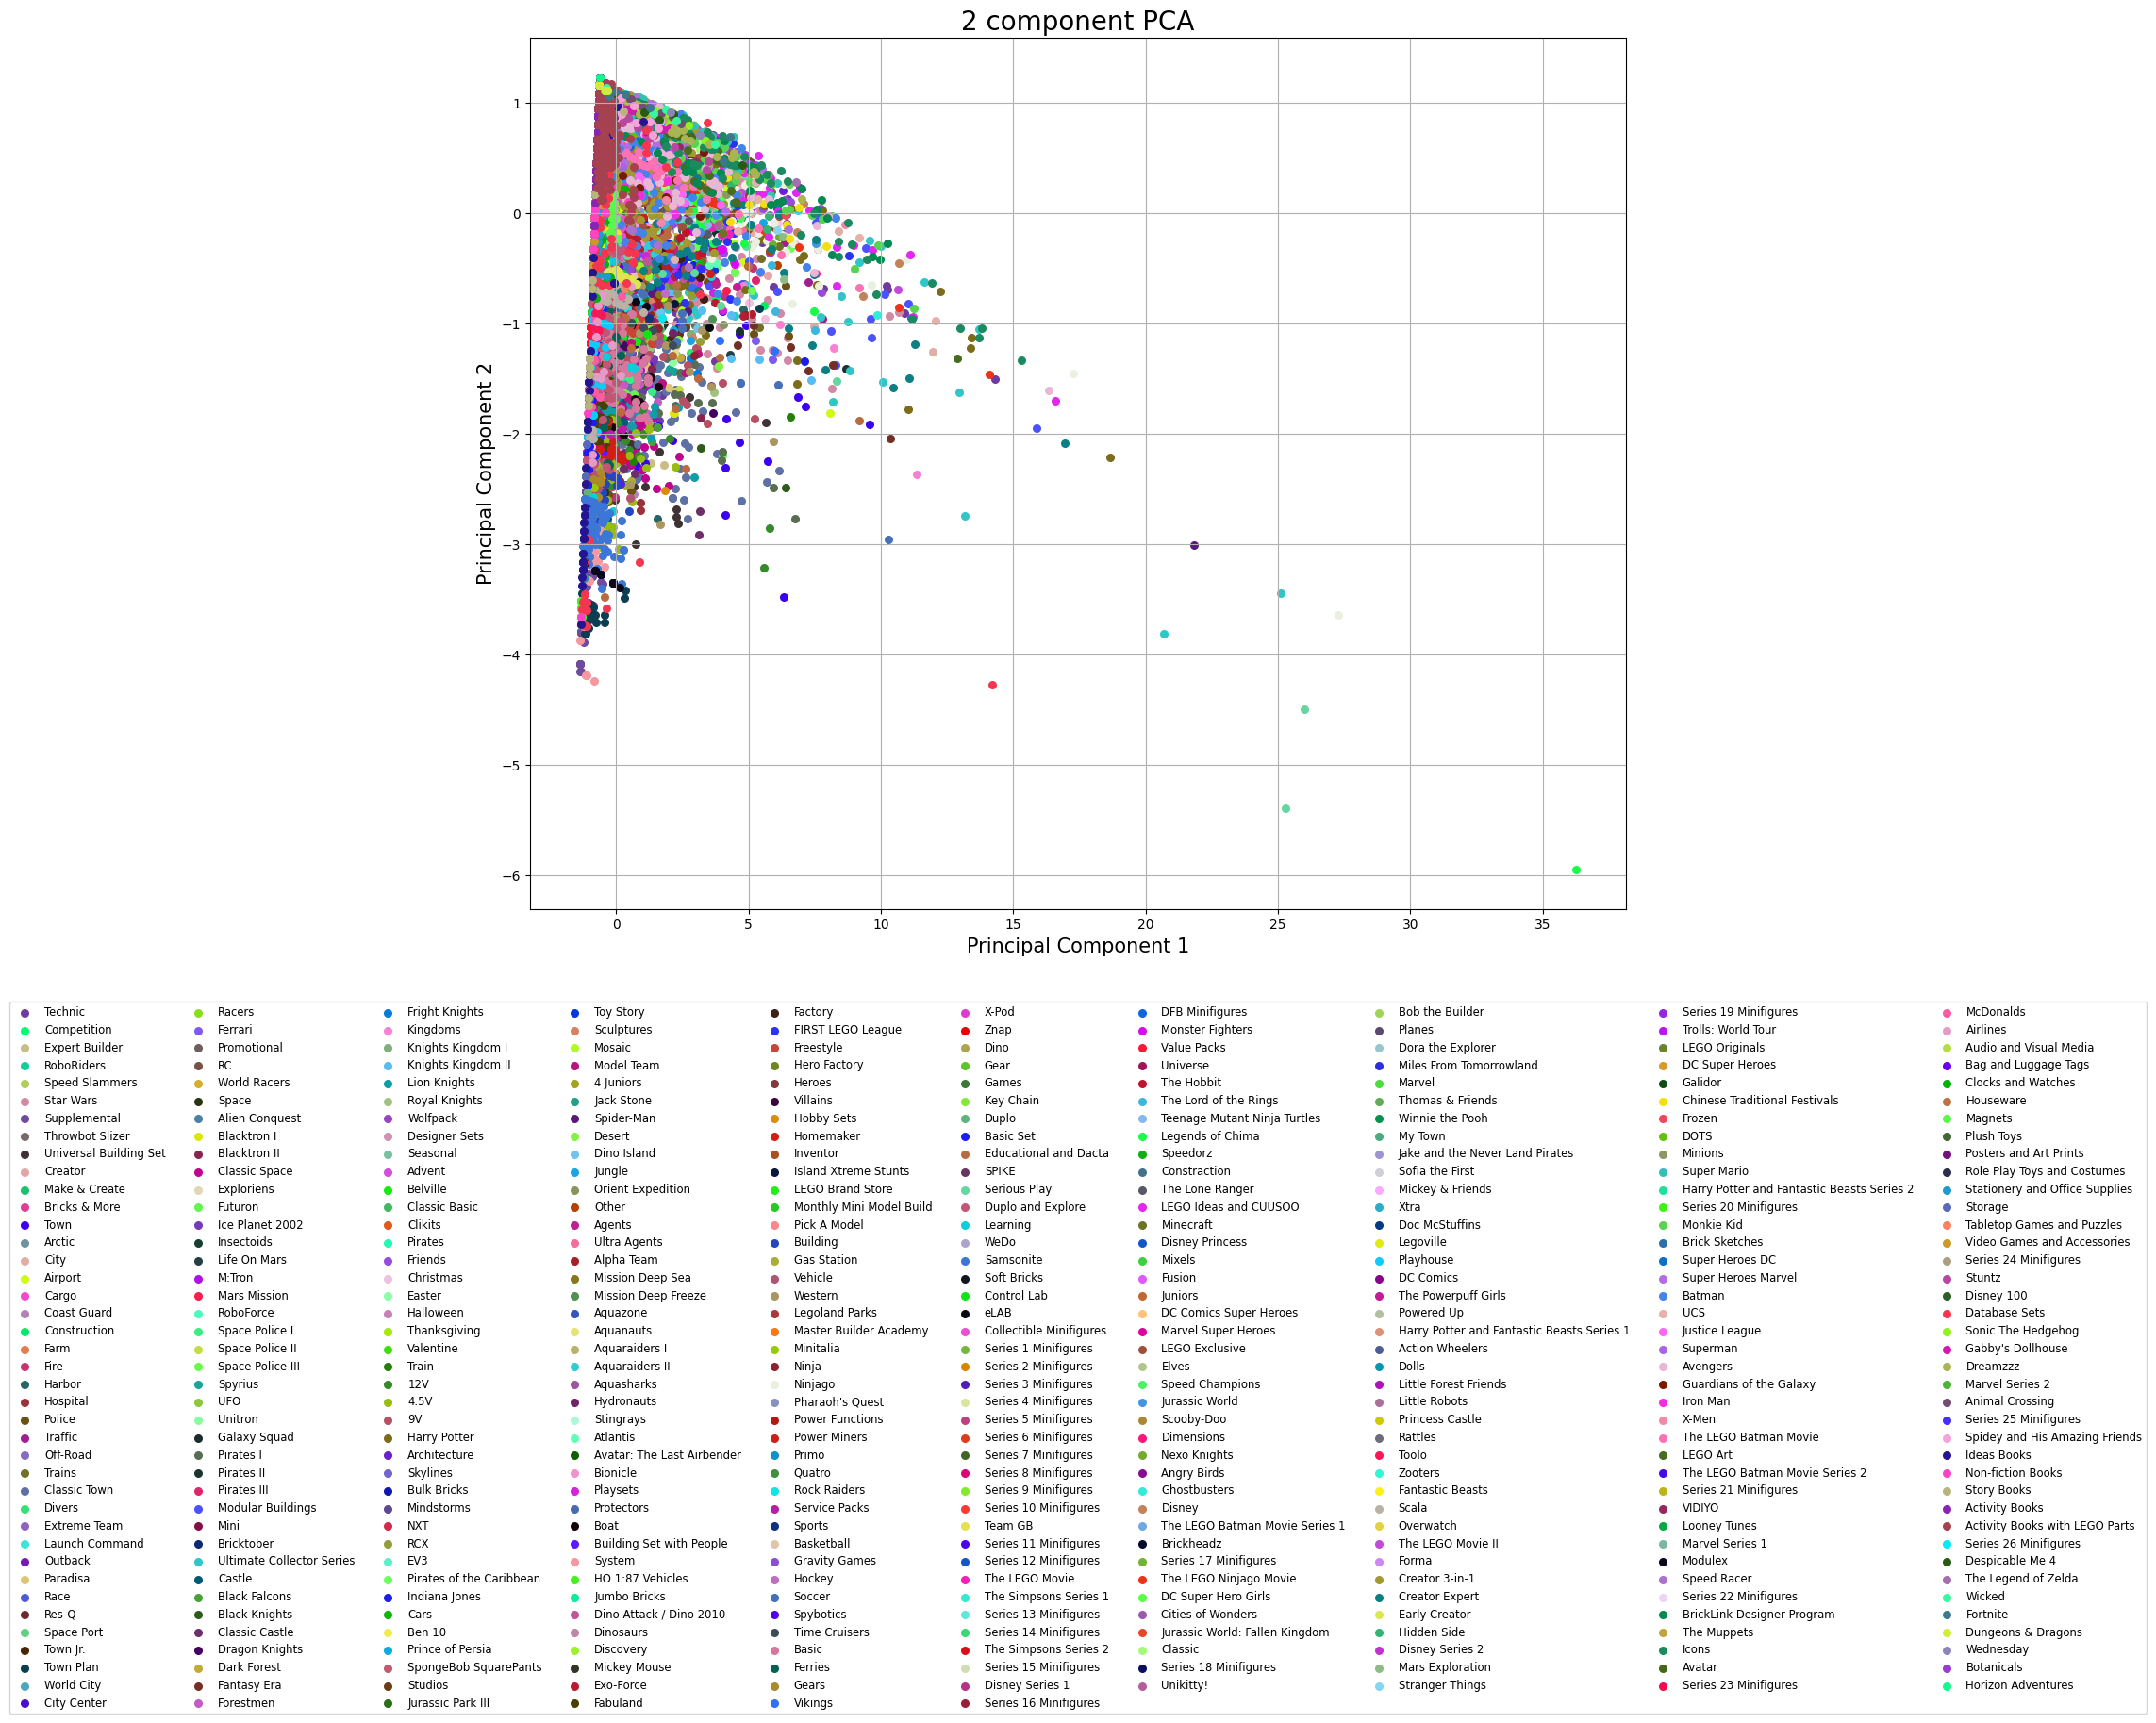

In [36]:
import random
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 component PCA', fontsize=20)

# Generowanie losowych kolorów dla każdego unikalnego tematu
unique_targets = finalDf['name_theme'].unique()
random_colors = {theme: [random.random() for _ in range(3)] for theme in unique_targets}

# Tworzenie wykresu
for theme, color in random_colors.items():
    indicesToKeep = finalDf['name_theme'] == theme
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'],
               c=[color],
               s=30,
               label=theme)

# Umieszczanie legendy pod wykresem
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fontsize='small', ncol=10)
ax.grid()

plt.show()

#### Wybranie top 5 najczęstszych nazw tematycznych

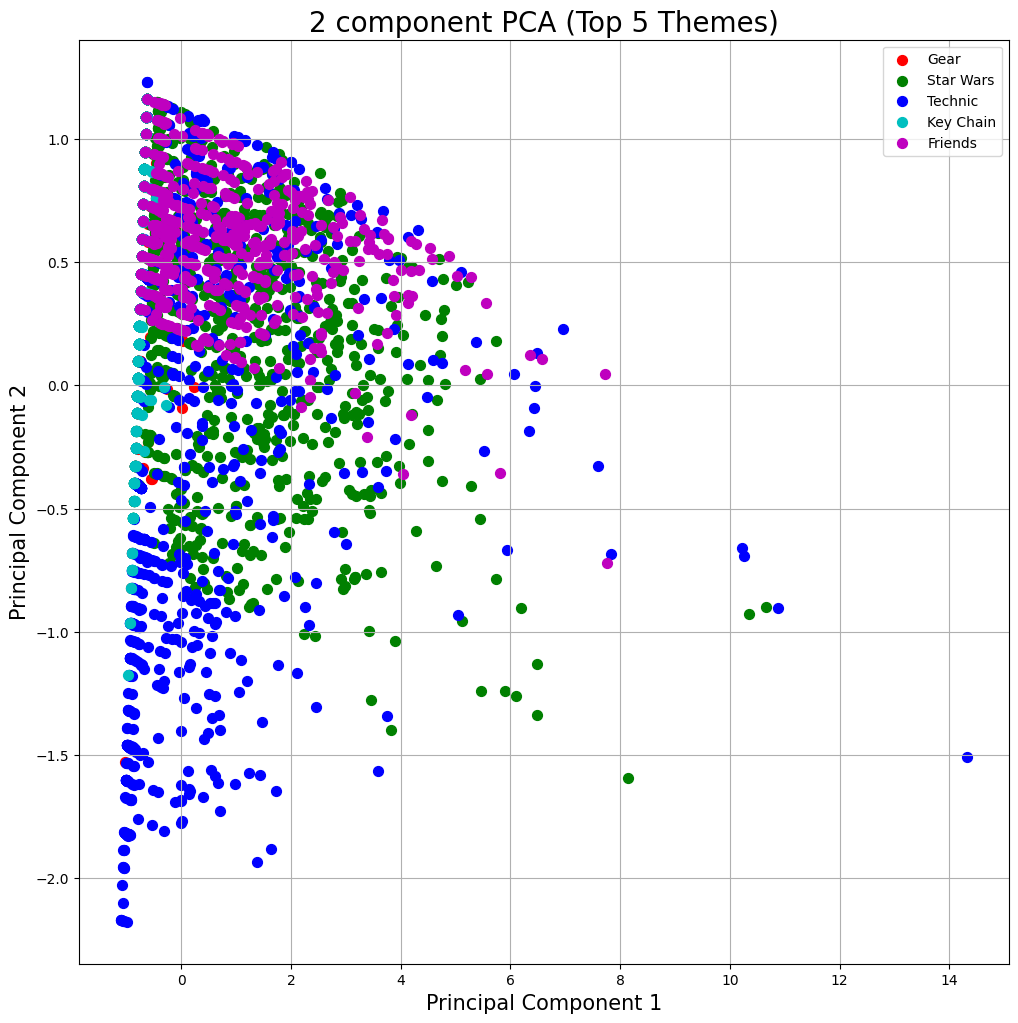

In [35]:
# Wybranie top 5 najczęstszych nazw tematycznych
top_themes = finalDf['name_theme'].value_counts().head(5).index

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 component PCA (Top 5 Themes)', fontsize=20)

colors = ['r', 'g', 'b', 'c', 'm']  # Kolory dla wybranych tematów
for theme, color in zip(top_themes, colors):
    indicesToKeep = finalDf['name_theme'] == theme
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'],
               c=color,
               s=50,
               label=theme)

ax.legend(top_themes, loc='best')
ax.grid()
plt.show()

In [37]:
pca.explained_variance_ratio_

array([0.54205251, 0.24476701])

Nasze PC1+PC2 zawierają 0.78 informacji więc całkiem sporo straciliśmy

## HCA test 1 (do całkowitej zmiany)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Wczytanie danych z CSV
inventories = pd.read_csv('inventories.csv')
inventory_parts = pd.read_csv('inventory_parts.csv')
parts = pd.read_csv('parts.csv')
colors = pd.read_csv('colors.csv')
inventory_minifigs = pd.read_csv('inventory_minifigs.csv')
sets = pd.read_csv('sets.csv')

# Sprawdzenie i dostosowanie kolumn
if 'id' in inventories.columns and 'inventory_id' not in inventories.columns:
    inventories.rename(columns={'id': 'inventory_id'}, inplace=True)

# a. Liczba części w zestawie
parts_count = inventory_parts.groupby('inventory_id')['quantity'].sum().reset_index()
parts_count.columns = ['inventory_id', 'total_parts']

# b. Liczba części w poszczególnych kolorach
parts_color_count = inventory_parts.merge(colors, left_on='color_id', right_on='id')
color_group = parts_color_count.groupby(['inventory_id', 'name'])['quantity'].sum().unstack(fill_value=0).reset_index()

# c. Liczba minifigurek w zestawie
minifigs_count = inventory_minifigs.groupby('inventory_id')['quantity'].sum().reset_index()
minifigs_count.columns = ['inventory_id', 'total_minifigs']

# d. Połączenie danych
inventory_features = inventories.merge(parts_count, on='inventory_id', how='left')
inventory_features = inventory_features.merge(color_group, on='inventory_id', how='left')
inventory_features = inventory_features.merge(minifigs_count, on='inventory_id', how='left')
inventory_features = inventory_features.fillna(0)  # Wypełnij brakujące wartości zerami

# Dodanie nazw zestawów
features = inventory_features.merge(sets[['set_num', 'name']], left_on='set_num', right_on='set_num')

# Wybór cech do analizy
columns_for_clustering = ['total_parts', 'total_minifigs'] + list(color_group.columns[1:])
clustering_data = features[columns_for_clustering]

# Normalizacja danych
scaler = StandardScaler()
normalized_data = scaler.fit_transform(clustering_data)

# HCA i dendrogram
linked = linkage(normalized_data, method='ward')



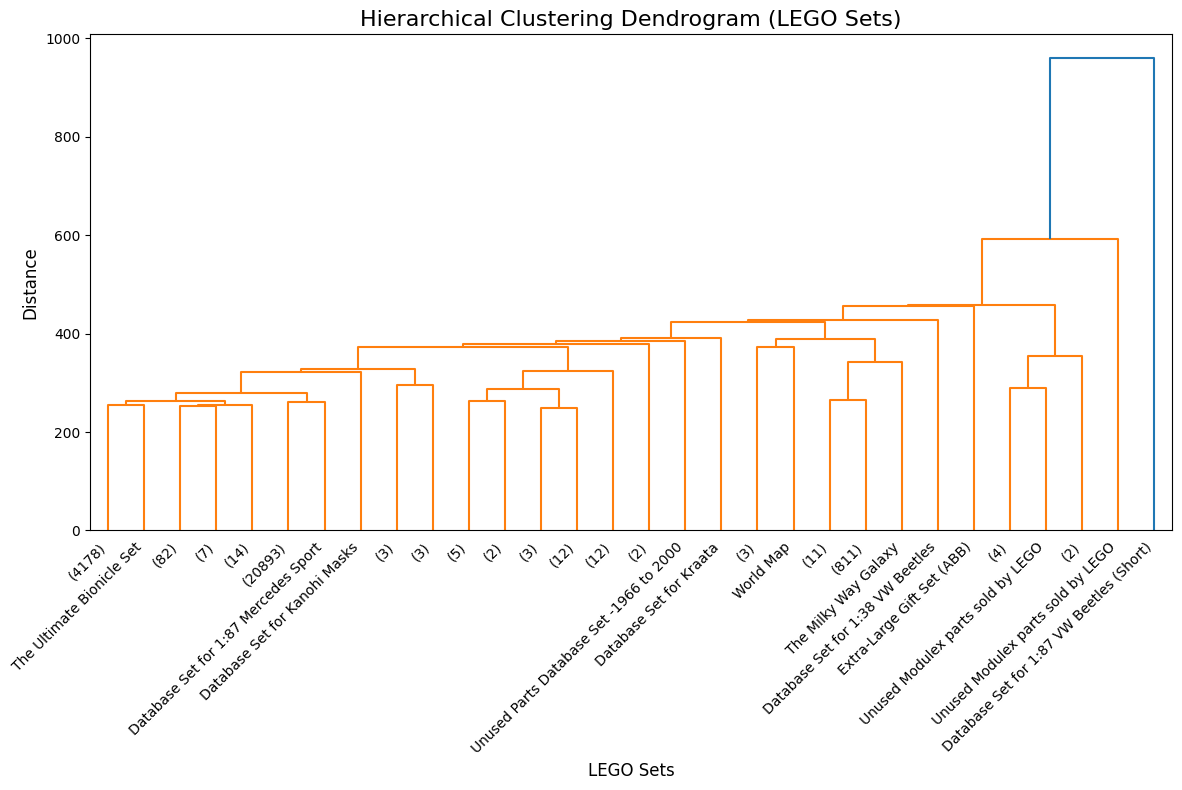

In [46]:
plt.figure(figsize=(12, 8))
dendrogram(linked, labels=features['name'].values, orientation='top',
           distance_sort='descending', show_leaf_counts=True,
           truncate_mode='lastp', p=30)  # Ogranicz do ostatnich 30 klastrów
plt.title("Hierarchical Clustering Dendrogram (LEGO Sets)", fontsize=16)
plt.xlabel("LEGO Sets", fontsize=12)
plt.ylabel("Distance", fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha='right')  # Obrót etykiet na osi X
plt.tight_layout()  # Automatyczne dopasowanie elementów
plt.show()